# **E-Commerce Customer Churn Analysis and Prediction**

By:
Indah Astary Suwandi

In [439]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, fbeta_score

# Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

## Business Understanding

### BACKGROUND

Di pasar terdapat banyak pesaing yang mana berlomba-lomba menawarkan berbagai keuntungan menyebabkan pelanggan mudah beralih dari satu e-commerce ke e-commerce lainnya.

Churn merupakan sebuh business metrics yang sangat penting karena dapat mengindikasikan kemampuan bisnis mempertahankan pelanggan serta mencerminkan kualitas layanan dan manfaat produk bagi pelanggan. Apabila pelanggan merasa tidak nyaman atau menganggap manfaat yang diberikan kurang atau tidak cocok untuk mereka maka otomatis mereka akan berhenti menggunakan produk kita. Bisa dikatakan ini merupakan bentuk feedback customer yang paling jujur.

Semakin tinggi churn rate maka semakin kecil revenue yang akan perusahaan raih di masa mendatang. Babu dan Ananthanarayanan (2014) menyatakan bahwa biaya untuk mendapatkan pelanggan baru jauh lebih besar dibandingkan mempertahankan pelanggan lama dengan jumlah revenue yang sama. Oleh karena itu, akan lebih efektif untuk perusahaan mencegah pelanggan yang sudah ada saat ini melakukan churn. Salah satunya dapat dilakukan Churn Prediction yang bertujuan untuk memprediksi potensi seorang pelanggan untuk churn sebelum pelanggan tersebut benar-benar melakukannya, dengan demikian dapat dilakukan strategi-strategi untuk meminimalisir kemungkinan churn.

Data yang akan diproses adalah data milik sebuah perusahaan E-Commerce. Perusahaan retail online (E-Commerce) ini ingin membuat Model churn prediction yang mampu memisahkan antara pengguna yang akan churn dan tidak churn di masa mendatang. Dengan mengetahui jenis dan pelanggan mana saja yang berpotensi Churn akan sangat membantu perusahaan bergerak lebih cepat, memberikan treatment seperti promosi, diskon, layanan lainnya secara tepat ke pelanggan tersebut.

Tujuan: membuat model yang dapat memisahkan antara pelanggan yang akan churn dan yang tidak


Note:
- Target dalam dataset tidak seimbang.
- Feature dalam dataset terbagi menjadi data numerikal dan kategorikal.
- Setiap baris data merepresentasikan data customer dan transaksinya dalam sebuah platform e-commerce.
<br>

**Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Tenure | Float | Tenure of a customer in the company |
| WarehouseToHome | Float | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | Integer | Total number of deceives is registered on a particular customer |
| PreferedOrderCat | Object | Preferred order category of a customer in the last month |
| SatisfactionScore | Integer | Satisfactory score of a customer on service |
| MaritalStatus | Object | Marital status of a customer |
| NumberOfAddress | Integer | Total number of added on a particular customer |
| Complain | Integer | Any complaint has been raised in the last month |
| DaySinceLastOrder | Float | Day since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Integer | Churn flag |

In [365]:
ecom_churn = pd.read_csv('data_ecommerce_customer_churn.csv')
ecom_churn

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


# EDA

In [366]:
ecom_churn.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [367]:
categorical_features = ['PreferedOrderCat', 'MaritalStatus']

for feature in categorical_features:
    summary = ecom_churn[feature].value_counts().reset_index()
    summary.columns = [feature, 'Frequency']
    summary['Count'] = summary['Frequency'].sum()
    summary['Unique'] = summary[feature].nunique()
    
    print(f"\nStatistik untuk {feature}:")
    print(summary)


Statistik untuk PreferedOrderCat:
     PreferedOrderCat  Frequency  Count  Unique
0  Laptop & Accessory       1458   3941       6
1        Mobile Phone        887   3941       6
2             Fashion        585   3941       6
3              Mobile        559   3941       6
4             Grocery        273   3941       6
5              Others        179   3941       6

Statistik untuk MaritalStatus:
  MaritalStatus  Frequency  Count  Unique
0       Married       2055   3941       3
1        Single       1310   3941       3
2      Divorced        576   3941       3


Terlihat pada PreferedOrderCat Mobile Phone dan Mobile memiliki makna yang sama namun penulisan berbeda. Ini akan disatukan di tahap EDA selanjutnya

### Missing Value

In [368]:
# Memeriksa missing value dan unique value pada dataset
dataDesc = []

for i in ecom_churn.columns:
    dataDesc.append([
        i,
        ecom_churn[i].isna().sum(),
        round((ecom_churn[i].isna().sum())/(ecom_churn[i].isna().count())*100,2),
        ecom_churn[i].nunique(),
        ecom_churn[i].unique(),
        ecom_churn[i].dtypes
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values', 'Type'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values,Type
0,Tenure,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,...",float64
1,WarehouseToHome,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0...",float64
2,NumberOfDeviceRegistered,0,0.00,6,"[4, 3, 6, 2, 5, 1]",int64
3,PreferedOrderCat,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ...",object
4,SatisfactionScore,0,0.00,5,"[3, 1, 4, 2, 5]",int64
5,MaritalStatus,0,0.00,3,"[Single, Married, Divorced]",object
6,NumberOfAddress,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]",int64
7,Complain,0,0.00,2,"[0, 1]",int64
8,DaySinceLastOrder,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,...",float64
9,CashbackAmount,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8...",float64


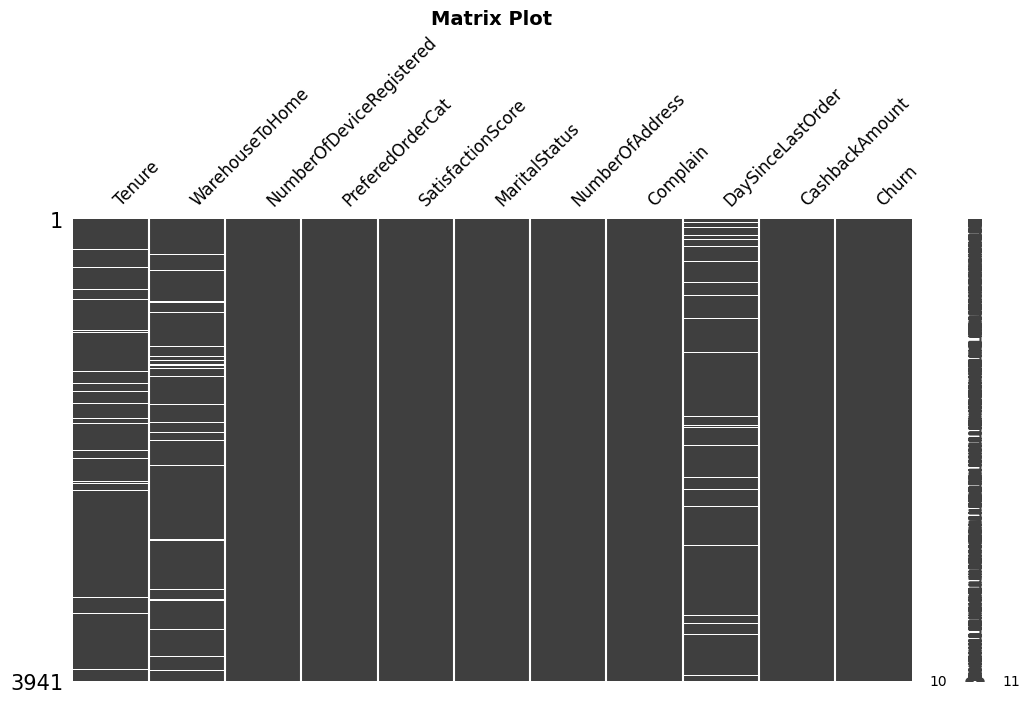

In [369]:
msno.matrix(ecom_churn, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

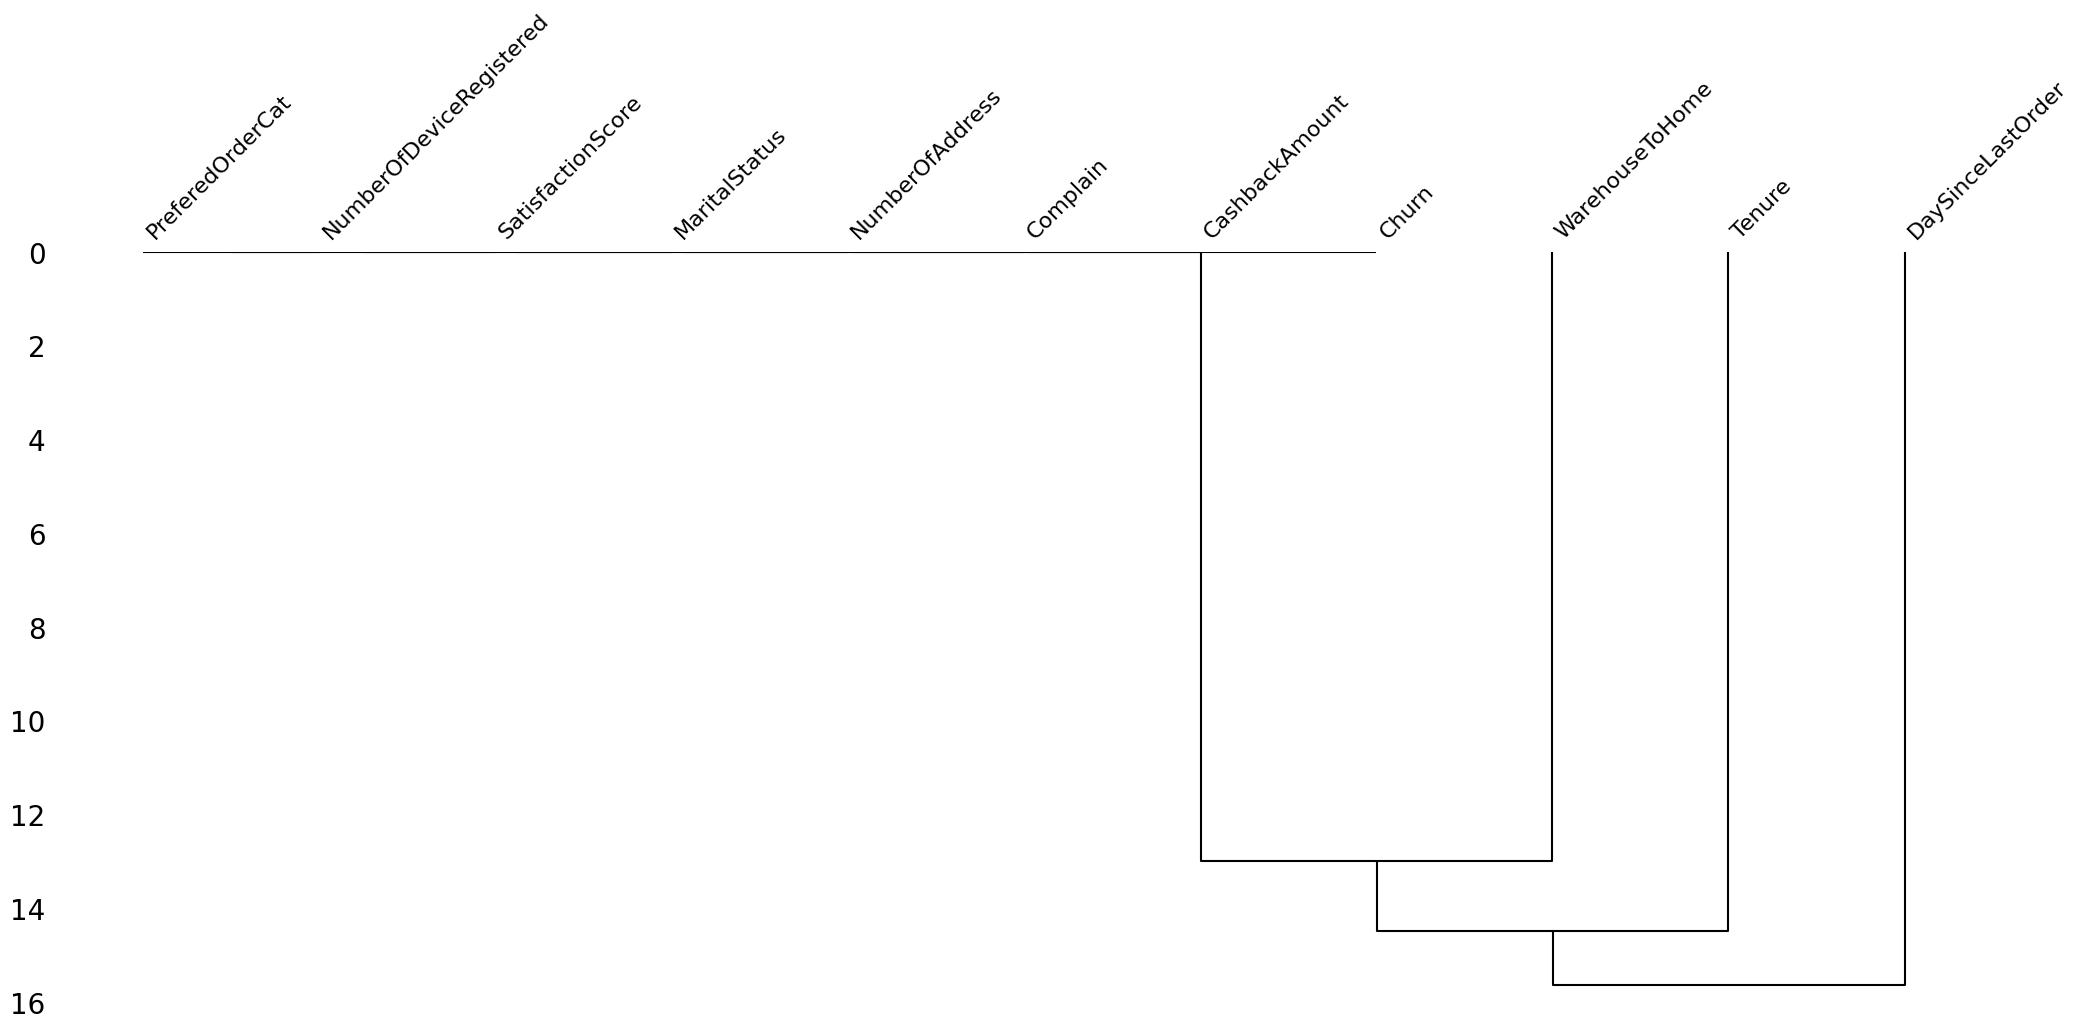

In [370]:
msno.dendrogram(ecom_churn)
plt.show()

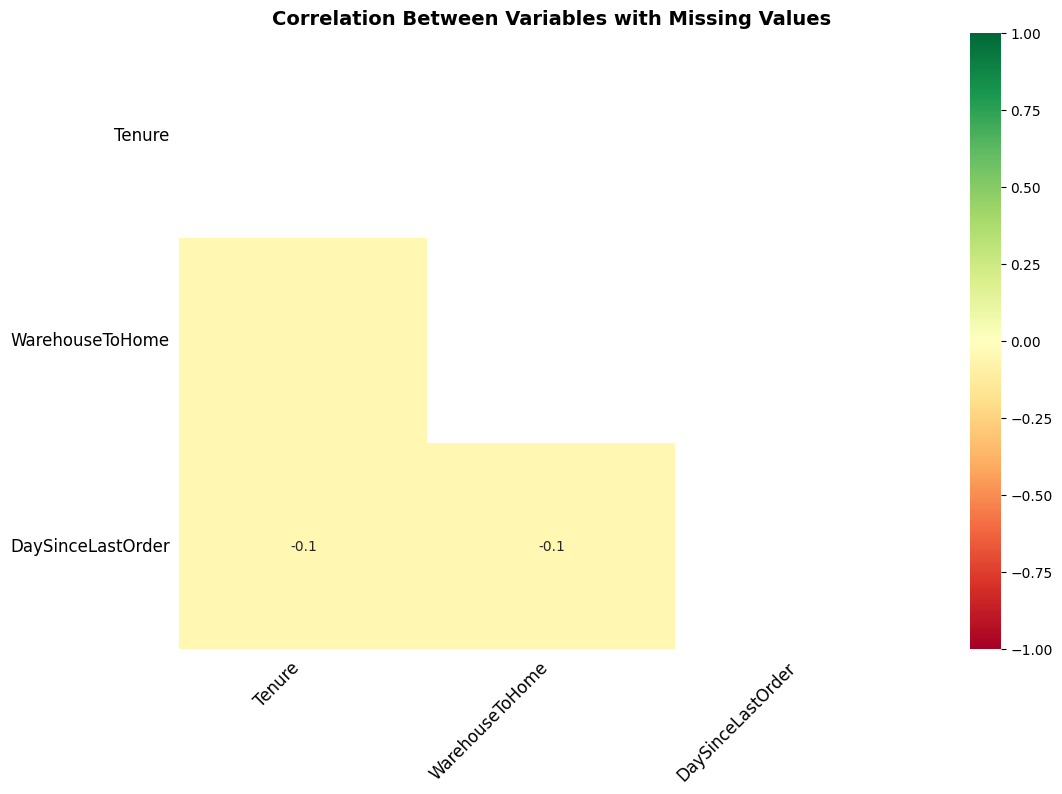

In [371]:
msno.heatmap(ecom_churn, cmap="RdYlGn", figsize=(12,8), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold');

Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

Sehingga dari beberapa visualisasi diatas, dapat disimpulkan bahwa missing value dalam dataset ini tidak saling berhubungan atau terjadi secara acak.

Missing value handling akan dilakukan lebih lanjut pada data pre-processing

### Data Distribution

Dalam dataset ini terlihat bahwa terdapat 17.1% customer yang meninggalkan layanan ecommerce perusahaan. Angka tersebut juga menunjukkan bahwa variable `Churn` yang merupakan target dalam modeling memiliki data yang [moderate imbalance](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=en). Data yang imbalance ini perlu ditreatment agar saat dilakukan modeling, algoritma tidak cenderung mempelajari data pelanggan yang tidak churn (0) dan cenderung lebih banyak belajar pad data kelas 1.

In [372]:
# Memudahkan pembagian variabel berdasarkan tipenya
kontinyu_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
diskrit_cols = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
numerik_cols = kontinyu_cols + diskrit_cols
kategorik_cols = ['PreferedOrderCat', 'MaritalStatus']

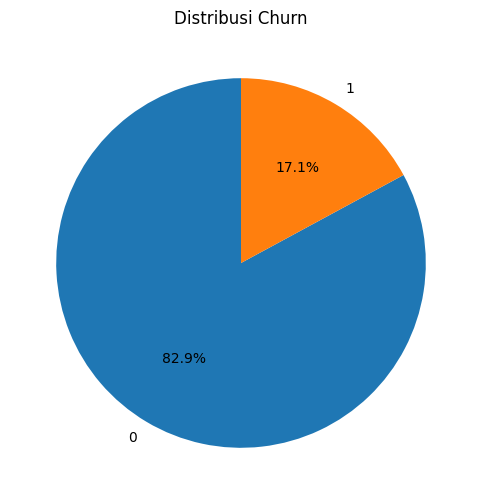

In [373]:
#Pie Chart untuk distribusi Churn
plt.figure(figsize=(8, 6))
ecom_churn['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Churn')
plt.ylabel('')
plt.show()

Dalam dataset ini terlihat bahwa terdapat 17.1% customer yang meninggalkan layanan ecommerce perusahaan. Angka tersebut juga menunjukkan bahwa variable `Churn` yang merupakan target dalam modeling memiliki data yang [moderate imbalance](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=en). Data yang imbalance ini perlu ditreat agar saat dilakukan modeling, algoritma tidak cenderung mempelajari data pelanggan yang tidak churn (0) dan lebih banyak belajar pada data kelas 1.

,column,skewness,pvalue score,average
0,Tenure,0.789571,9.014014e-70,10.081398
1,WarehouseToHome,1.428746,1.067451e-282,15.650583
2,DaySinceLastOrder,1.337376,9.481224e-245,4.531652
3,CashbackAmount,1.143194,9.481224e-245,176.707419


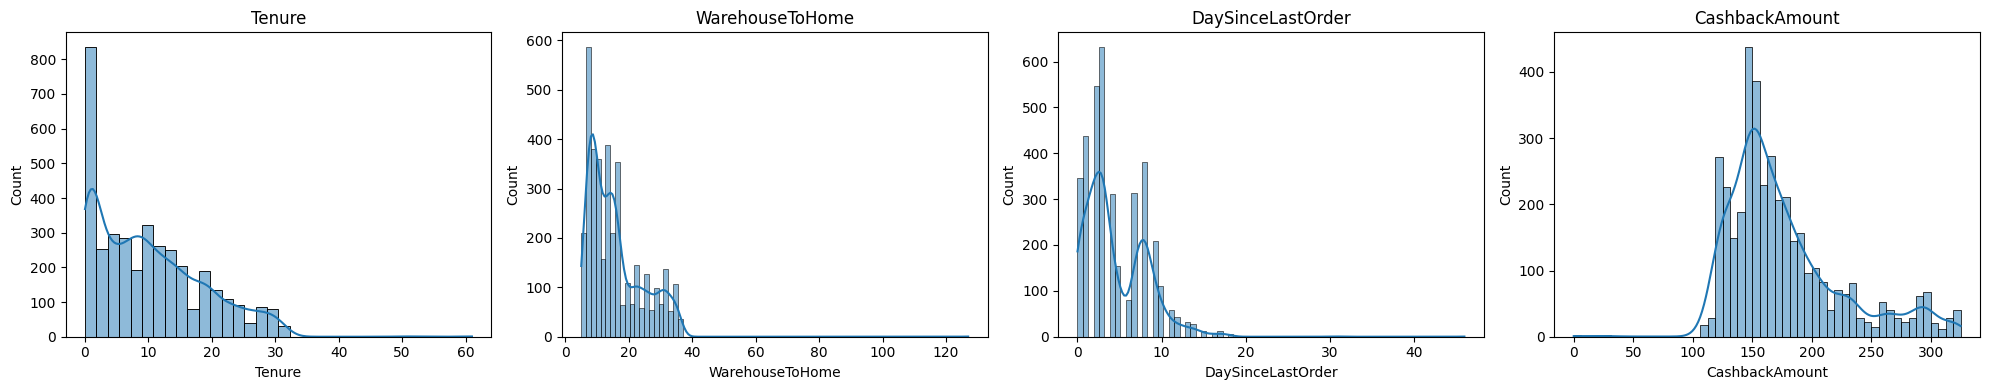

In [374]:
# Continuous variable
fig = plt.figure(figsize=(20,4))
subplot = 1

for cont in kontinyu_cols:
    plt.subplot(1,4,subplot)
    sns.histplot(data=ecom_churn, x=cont, kde=True)
    plt.title(cont)
    plt.tight_layout()
    subplot+=1

list_pvalue_cont = []
skew_cont = []
average_summary = []

for cont in kontinyu_cols:
    if ecom_churn[cont].isna().any() == True:
        s, pval = normaltest(ecom_churn[cont].dropna())
        list_pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(ecom_churn[cont].dropna())
        list_pvalue_cont.append(pval)
    skew_cont.append(ecom_churn[cont].skew())

for cont in kontinyu_cols:
    average_summary.append(ecom_churn[cont].mean())

pvalue_cont = pd.DataFrame({'column': kontinyu_cols, 'skewness': skew_cont, 'pvalue score': list_pvalue_cont, 'average': average_summary})
pvalue_cont

Seluruh data kontinyu memiliki distribusi data tidak normal atau right skewed dengan skew > 0 

Dari data di atas diinterpretasikan sebagai berikut:
- Pada variable `Tenure` terlihat bahwa banyak customer yang menggunakan e-commerce ini kurang dari dua bulan. Sedangkan untuk diatas satu bulan, waktu yang dihabiskan customer cenderung fluktuatif namun semakin menurun.
- Dalam variabel `WarehouseToHome` menggambarkan jarak antara gudang pengiriman e-commerce dengan rumah pelanggan dengan rentang jarak beragam, dari yang paling dekat yaitu 5 km dan paling jauh hingga 127 km.
- `DaySinceLastOrder` menunjukkan jumlah hari dari terakhir customer melakukan transaksi sampai dengan waktu penarikan data ini. Rata-rata customer paling lama tidak berbelanja 4 hari sebelum akhirnya melakukan transaksi belanja kembali.
- `CashbackAmount` menggambarkan rata-rata cashback yang diterima customer berdasarkan transaksi bulan lalu. Disini ditunjukkan bahwa customer paling banyak menerima cashback di rentang sekitar $176 berdasarkan transaksi bulan lalu.

,column,skewness,pvalue score,mode
0,NumberOfDeviceRegistered,-0.409874,9.160680e-32,4
1,SatisfactionScore,-0.163771,0.000000e+00,3
2,NumberOfAddress,1.086842,2.262399e-131,2
3,Complain,0.967035,0.000000e+00,0


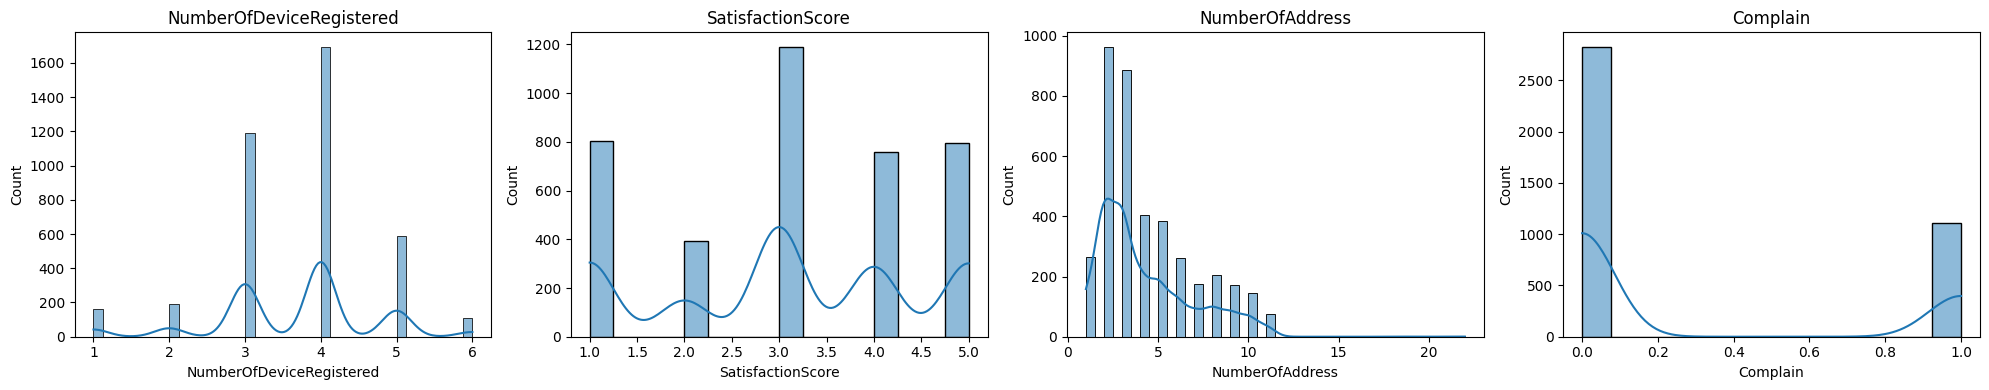

In [375]:
# Discrete variable
fig = plt.figure(figsize=(20,4))
subplot = 1

for cont in diskrit_cols:
    plt.subplot(1,4,subplot)
    sns.histplot(data=ecom_churn, x=cont, kde=True)
    plt.title(cont)
    plt.tight_layout()
    subplot+=1

list_pvalue_cont = []
skew_cont = []
most_frequent = []

for cont in diskrit_cols:
    if ecom_churn[cont].isna().any() == True:
        s, pval = normaltest(ecom_churn[cont].dropna())
        list_pvalue_cont.append(pval)
    else:
        s, pval = normaltest(ecom_churn[cont].dropna())
        list_pvalue_cont.append(pval)
    skew_cont.append(ecom_churn[cont].skew())

for cont in diskrit_cols:
    most_frequent.append(ecom_churn[cont].mode()[0])

pvalue_cont = pd.DataFrame({'column': diskrit_cols, 'skewness': skew_cont, 'pvalue score': list_pvalue_cont, 'mode': most_frequent})
pvalue_cont

`NumberOfDeviceRegistered`dan `SatisfactionScore` memiliki data negatively skewed lalu `NumberOfAddress`dan `Complain`positively skewed

Dari data di atas diinterpretasikan sebagai berikut:
- Pada variable `NumberOfDeviceRegistered` terlihat kebanyakan pelanggan meregistrasikan empat device ke e-commerce ini
- Dalam variabel `SatisfactionScore` kebanyakan memberi skor tiga atas kepuasannya menggunakan layanan e-commerce
- `NumberOfAddress` menunjukkan jumlah alamat yang diregistrasikan ke e-commerce baik itu alamat pengiriman, pengembalian, dll
- `Complain` menggambarkan apakah pelanggan pernah melakukan complain (1) atau tidak (0)

Berdasarkan temuan sebelumnya pada PreferedOrderCat terdapat kategori yang sebenarnya memiliki arti sama namun ditulis berbeda yaitu 'Mobile Phone' dan 'Phone'untuk itu dilakukan penggabungan menjadi 1 nama value saja agar memudahkan dalam pemahaman data. Berikut dibawah adalah visualisasi variabel kategorik yang sudah disesuaikan

In [376]:
ecom_churn['PreferedOrderCat'] = ecom_churn['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

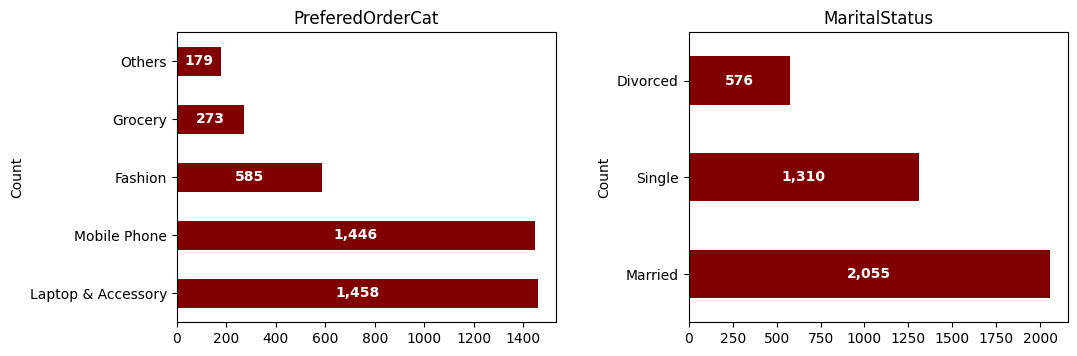

In [377]:
# Categorical variable visualization
fig = plt.figure(figsize=(16,10))
subplot = 1

for cat in kategorik_cols:
    ax = plt.subplot(3,3,subplot)
    ax = ecom_churn[cat].value_counts().plot(kind='barh', color=['maroon'])
    plt.ylabel('Count')
    plt.xlabel(None)
    plt.title(cat, size=12)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='center', padding = 0, color="white", fontweight='bold')
    plt.tight_layout(w_pad = 3)
    subplot+=1

### Data Numerik VS Target (Churn)

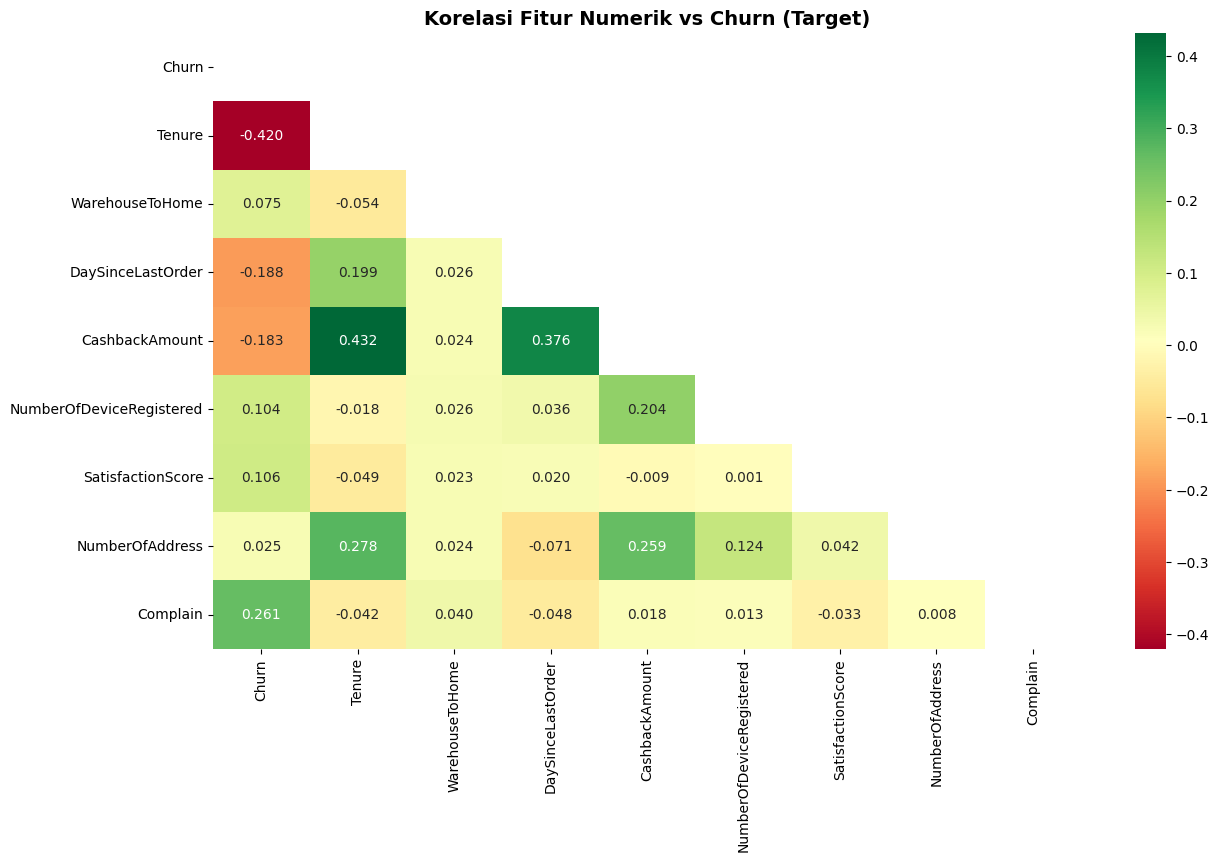

In [378]:
corr = ecom_churn[['Churn'] + numerik_cols].corr(method='spearman')
plt.figure(figsize=(14,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Korelasi Fitur Numerik vs Churn (Target)', size=14, weight='bold');

Berdasarkan heatmap correlation yang menunjukkan berdasarkan korelasi numerical feature dengan `Churn`  adalah sebagai berikut:
- Feature `Tenure` memiliki hubungan korelasi negatif terkuat dengan score **-0.420** dan kekuatan hubungannya moderate. Sehingga diasumsikan semakin rendah tenure dari customer, maka semakin tinggi angka customer yang churn.
- Lalu feature `Complain` memiliki hubungan korelasi positif terkuat dengan score **0.261** dan kekuatan hubungan yang lemah.
- Feature-feature lainnya memiliki hubungan korelasi yang sangat lemah dengan score dibawah 0.2.
- Selain feature yang berhubungan langsung dengan `Churn`, bisa juga jadi notes bahwa korelasi `CashbackAmount` dan `Tenure` memiliki hubungan positif terkuat sebesar **0.432** di antara seluruh korelasi

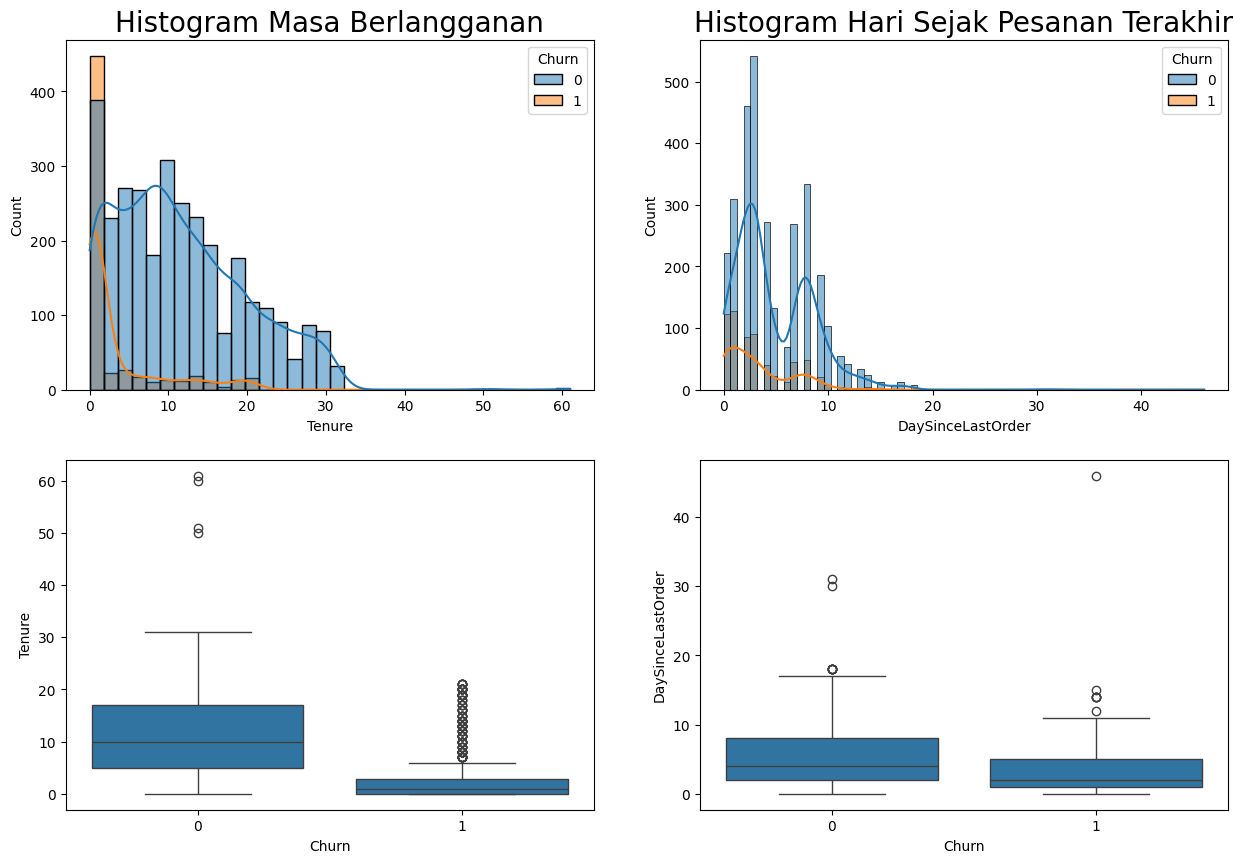

In [379]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=ecom_churn,x='Tenure',hue='Churn',kde=True)
plt.title('Histogram Masa Berlangganan',fontsize=20)

plt.subplot(222)
sns.histplot(data=ecom_churn,x='DaySinceLastOrder',hue='Churn',kde=True)
plt.title('Histogram Hari Sejak Pesanan Terakhir',fontsize=20)

plt.subplot(223)
sns.boxplot(data=ecom_churn,y='Tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=ecom_churn,y='DaySinceLastOrder', x='Churn')
plt.show()

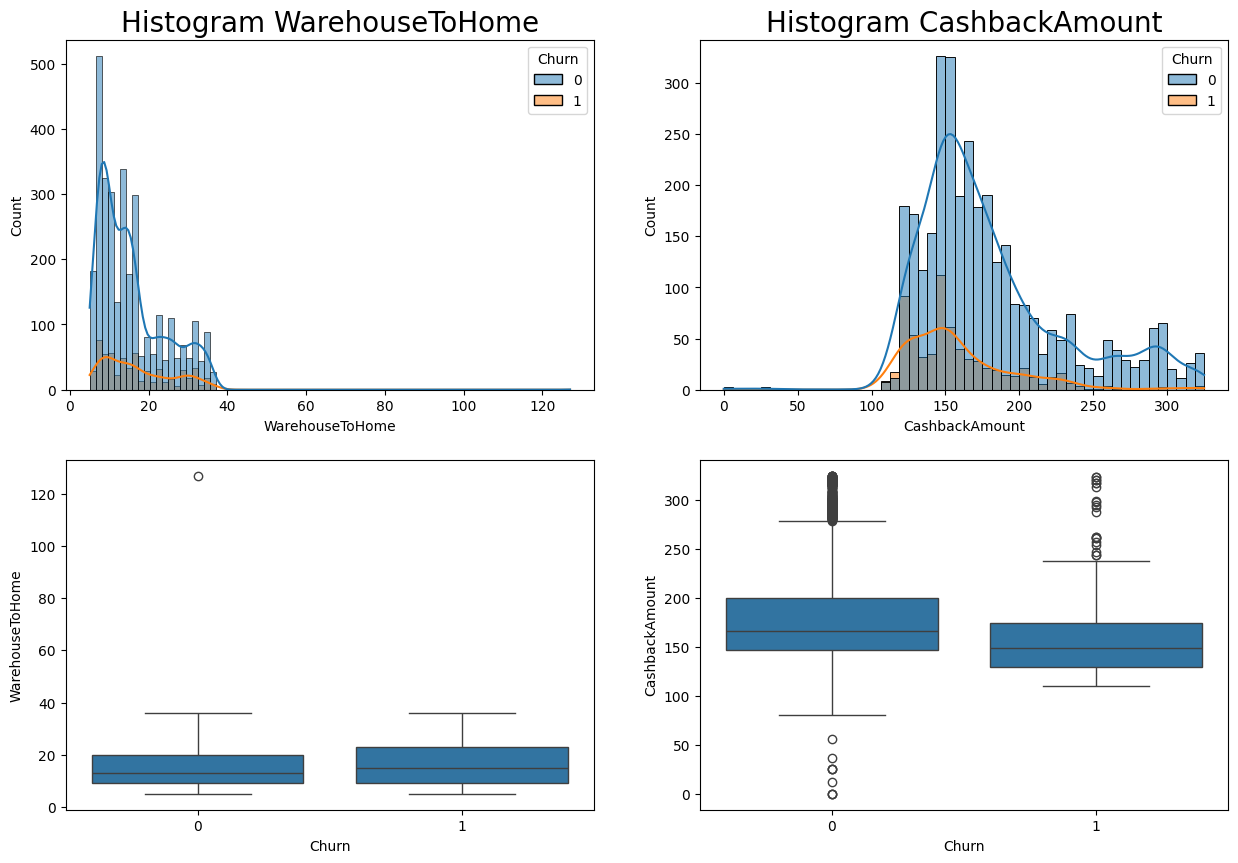

In [380]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=ecom_churn,x='WarehouseToHome',hue='Churn',kde=True)
plt.title('Histogram WarehouseToHome',fontsize=20)

plt.subplot(222)
sns.histplot(data=ecom_churn,x='CashbackAmount',hue='Churn',kde=True)
plt.title('Histogram CashbackAmount',fontsize=20)

plt.subplot(223)
sns.boxplot(data=ecom_churn,y='WarehouseToHome', x='Churn')

plt.subplot(224)
sns.boxplot(data=ecom_churn,y='CashbackAmount', x='Churn')
plt.show()

### Data Kategorik VS Target (Churn)

Untuk melihat menguji keterkaitan antara feature categorical dengan target, disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:
- Ho: feature categorical dan target `Churn` tidak saling terkait (independent)
- Ha: feature categorical dan target `Churn` saling terkait (dependent)

In [381]:
# Melakukan uji chi square
cat_cols = list(ecom_churn.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(ecom_churn[i], ecom_churn['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


Berdasarkan hasil uji chi-square diatas, diketahui bahwa semua feature categorical memiliki chi-square score < 0.05 (berhasil menolak Ho). Artinya masing-masing feature categorical saling terkait dengan target `Churn` (proporsinya berbeda signifikan).

In [382]:
ecom_churn.dtypes

Tenure                      float64
WarehouseToHome             float64
NumberOfDeviceRegistered      int64
PreferedOrderCat             object
SatisfactionScore             int64
MaritalStatus                object
NumberOfAddress               int64
Complain                      int64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
dtype: object

## Data Analysis

Setelah dilakukan exploratory dan membuat visualisasi datanya di atas. Muncul beberapa pertanyaan sebagai berikut:

- Apakah pelanggan berhenti menggunakan layanan e-commerce pada bulan pertama menggunakannya?
- Apakah jumlah cashback yang didapat pelanggan berpengaruh pada churn?
- Apakah pelanggan yang pernah mengajukan complain cenderung berhenti menggunakan layanan e-commerce?
- Apakah semakin rendah angka kepuasannya maka semakin tinggi pula churn-nya?
- Apakah pelanggan yang telah lebih dari seminggu tidak belanja cenderung akan churn?
- Apakah pelanggan yang banyak meregistrasikan alamat maupun device nya pada e-commerce cenderung tidak melakukan churn?
- Bagaimana kondisi churn pada marital status? Apakah pelanggan yang sudah menikah sedikit yang berhenti menggunakan layanan e-commerce ini?

**Apakah pelanggan berhenti menggunakan layanan e-commerce pada bulan pertama menggunakannya?**

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,152.0,195.0,347.0,56.2
1.0,237.0,252.0,489.0,51.5
2.0,107.0,10.0,117.0,8.5
3.0,123.0,13.0,136.0,9.6
4.0,138.0,13.0,151.0,8.6
5.0,132.0,13.0,145.0,9.0


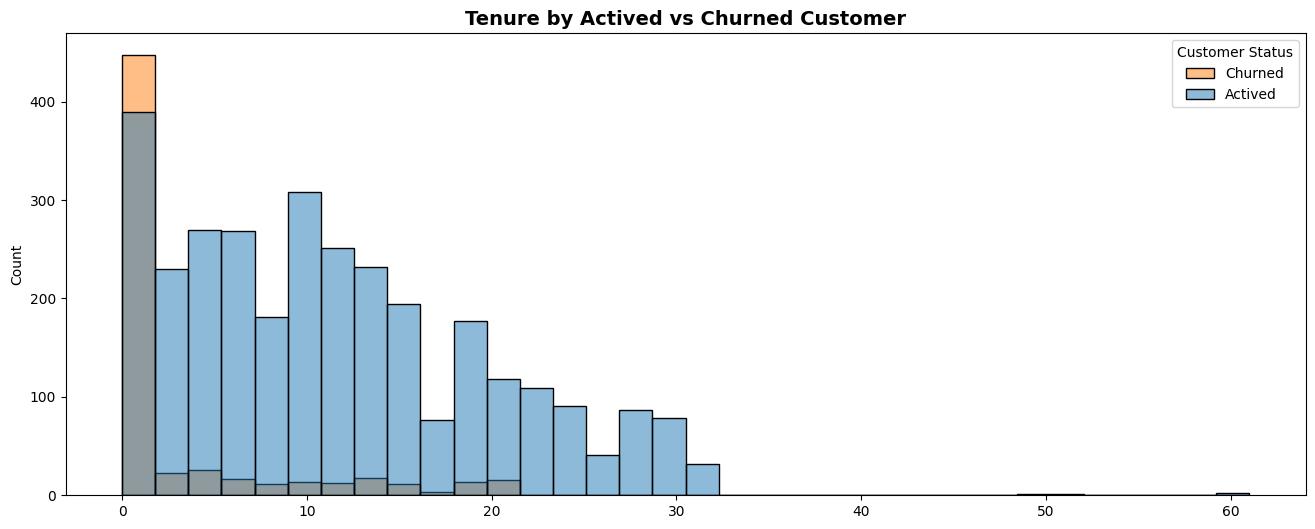

In [383]:
# Function untuk crosstab table
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(ecom_churn[col1], ecom_churn[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(16,6))
ax = sns.histplot(data=ecom_churn, x='Tenure', hue='Churn')
ax.set_title('Tenure by Actived vs Churned Customer', size=14, weight='bold')
ax.set_xlabel(None)
plt.legend(title='Customer Status', labels=['Churned', 'Actived'])

crosstab_viz('Churn', 'Tenure').T.head(6)

**Apakah jumlah cashback yang didapat pelanggan berpengaruh pada churn?**

CashbackBins,0-50,50-100,100-150,150-200,200-250,250-300
Churn,,,,,,
0,8.0,2.0,967.0,1477.0,414.0,306.0
1,0.0,0.0,351.0,226.0,79.0,11.0
Total,8.0,2.0,1318.0,1703.0,493.0,317.0
Churn %,0.0,0.0,26.6,13.3,16.0,3.5


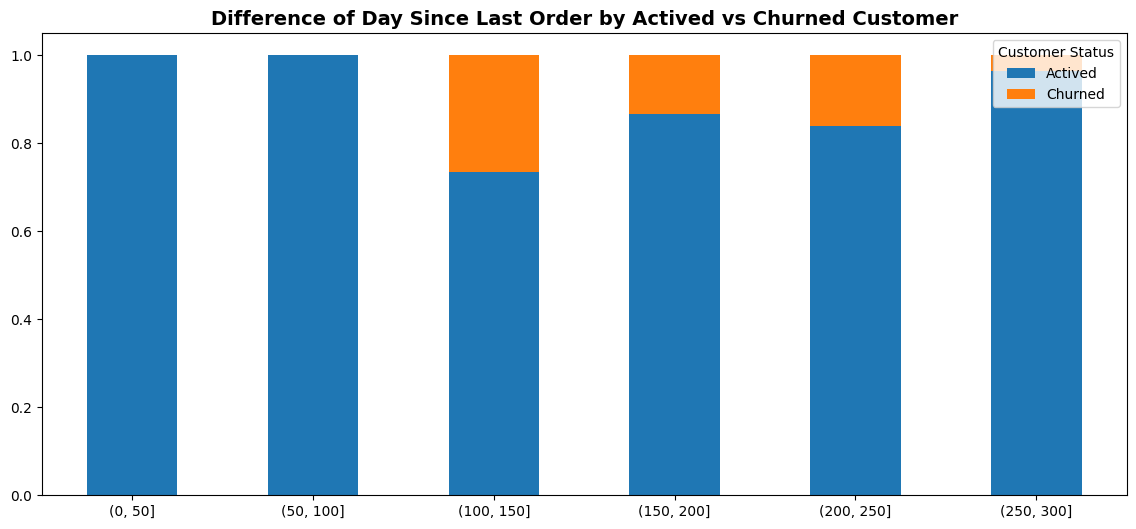

In [384]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
order_churn = ecom_churn.groupby(pd.cut(ecom_churn['CashbackAmount'], bins=[0, 50, 100, 150, 200, 250, 300]))['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')
plt.title('Difference of Day Since Last Order by Actived vs Churned Customer', size=14, weight='bold');

# Definisikan bins
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Buat kolom baru dengan bins
ecom_churn['CashbackBins'] = pd.cut(ecom_churn['CashbackAmount'], bins=bins, labels=labels, right=False)

# Buat crosstab dan tambah persentase churn
crosstab = pd.crosstab(ecom_churn['Churn'], ecom_churn['CashbackBins'])
crosstab.loc['Total'] = crosstab.sum()
crosstab.loc['Churn %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
crosstab



Terlihat pada jumlah cashback 0 sampai dengan $100 efektif atau bahkan mungkin cenderung tidak berpengaruh atas churn pelanggan. Mulai terlihat ada churn di range 100-150 namun seiring meningkatnya jumlah cashback maka churn juga cenderung semakin kecil

  Cashback Range  Average Tenure  Churn %
0           0-50        6.750000     0.00
1         50-100        0.500000     0.00
2        100-150        6.711744    26.63
3        150-200        9.093365    13.27
4        200-250       13.196755    16.02
5        250-300       19.252366     3.47


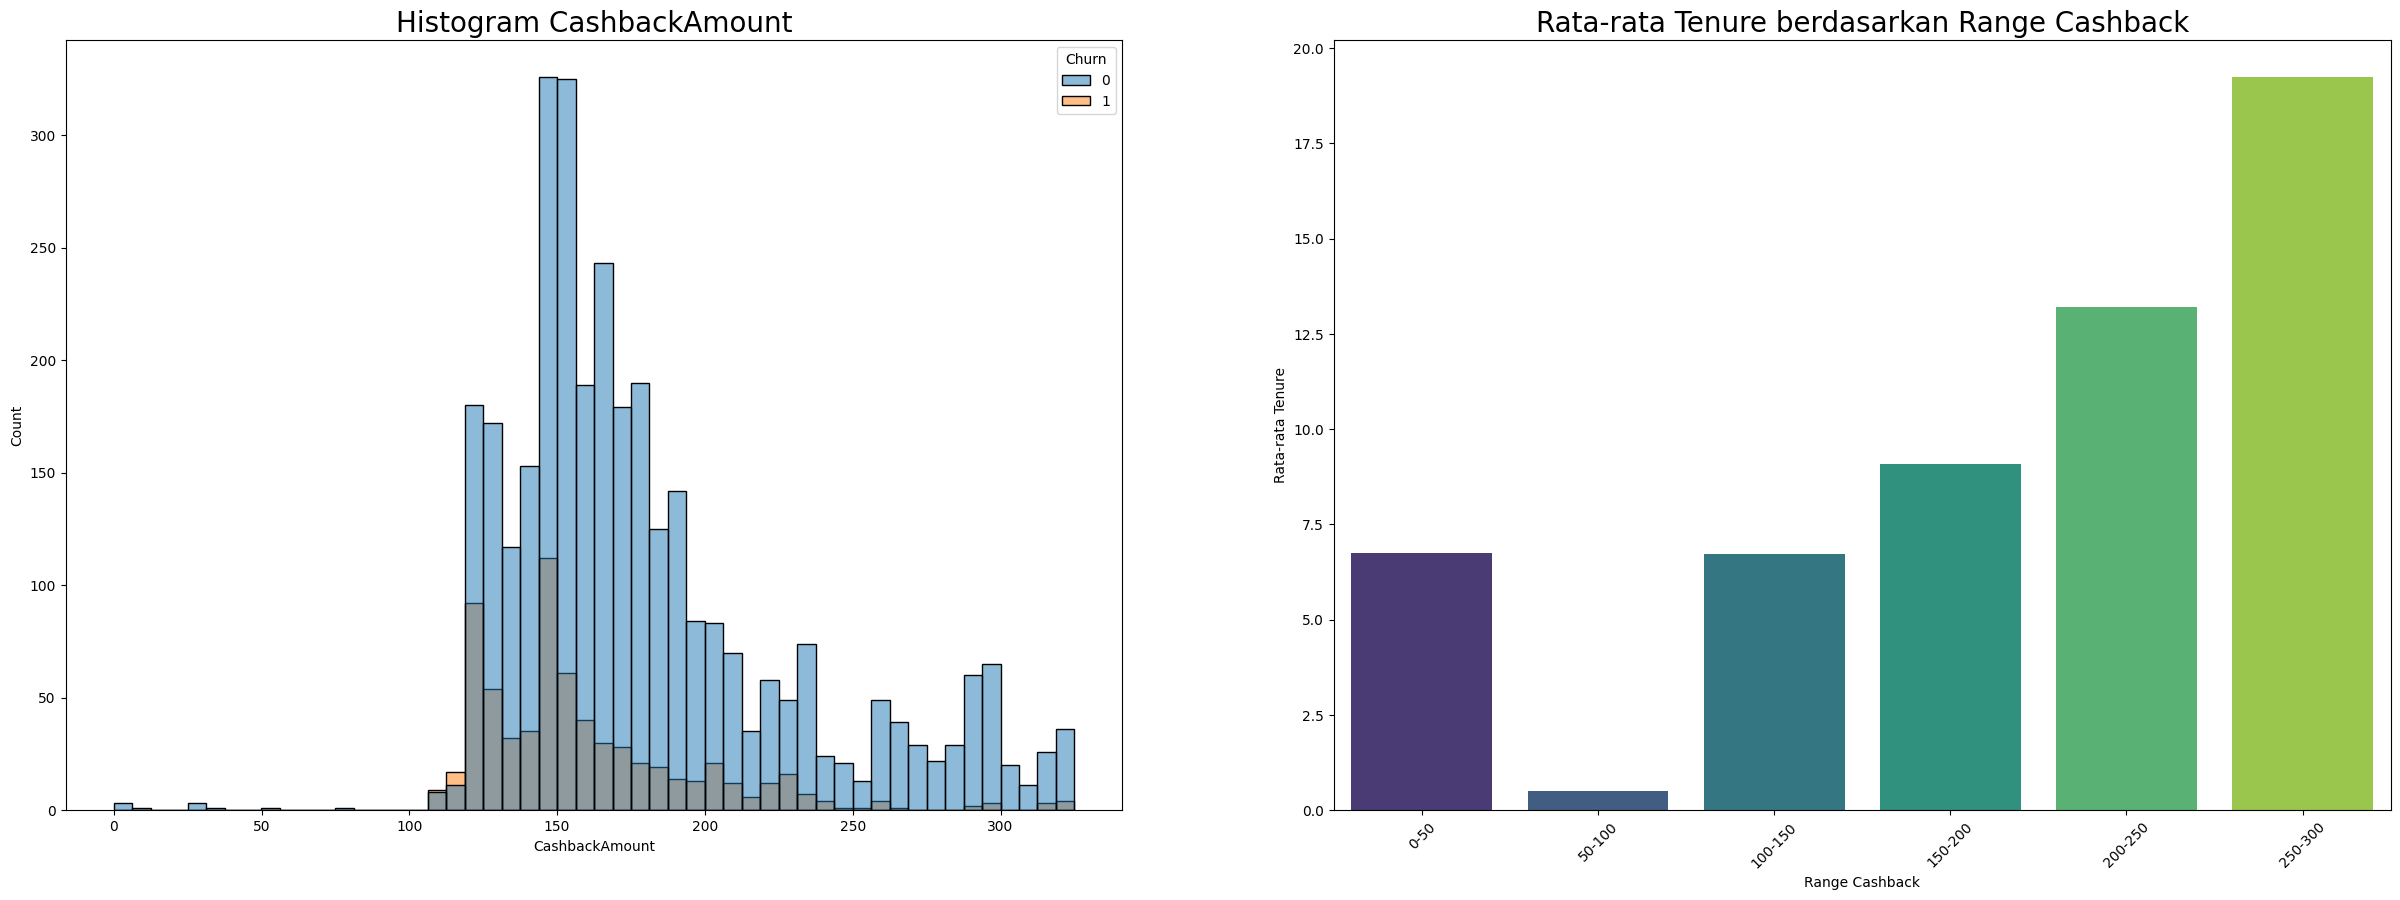

In [385]:
# Crosstab Cashback dengan rata-rata Tenure dan churn dalam persentase
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

ecom_churn['CashbackBins'] = pd.cut(ecom_churn['CashbackAmount'], bins=bins, labels=labels, right=False)

average_tenure_by_cashback = ecom_churn.groupby('CashbackBins')['Tenure'].mean().reset_index()

average_tenure_by_cashback.columns = ['Cashback Range', 'Average Tenure']
average_tenure_by_cashback['Churn %'] = (ecom_churn.groupby('CashbackBins')['Churn'].mean() * 100).round(2).reset_index()['Churn']
print(average_tenure_by_cashback)


fig, axs = plt.subplots(1, 2, figsize=(30, 10))
# Grafik Histogram CashbackAmount
sns.histplot(data=ecom_churn, x='CashbackAmount', hue='Churn', kde=False, ax=axs[0])
axs[0].set_title('Histogram CashbackAmount', fontsize=20)

# Visualisasi rata-rata Tenure berdasarkan Cashback Range
sns.barplot(data=average_tenure_by_cashback, x='Cashback Range', y='Average Tenure', palette='viridis', ax=axs[1])
axs[1].set_title('Rata-rata Tenure berdasarkan Range Cashback', fontsize=20)
axs[1].set_xlabel('Range Cashback')
axs[1].set_ylabel('Rata-rata Tenure')
axs[1].tick_params(axis='x', rotation=45)

plt.show()

Mengingat CashbackAmount dan Tenure memiliki korelasi yang paling kuat secara positif dibanding feature lainnya maka untuk membantu memahami Churn atas CashbackAmount dibuat visualisasi Tenure atas CashBackAmount. Dimana pada beberapa range awal CashbackAmount angka persentase cenderung flutuatif dan tidak bisa dilihat efek pengaruh dari jumlah cashback ini dan dilihat pada visualisasi CashbackAmount atas Tenure sampai range 100-150 juga angka masih fluktuatif namun setelah itu terlihat kencenderungannya cukup memberi efek pada pelanggan untuk menggunakan layanan e-commerce lebih lama lagi

**Apakah pelanggan yang pernah mengajukan complain cenderung berhenti menggunakan layanan e-commerce?**

Complain,0,1
Churn,,
0,2519.0,748.0
1,309.0,365.0
Total,2828.0,1113.0
Churn %,10.9,32.8


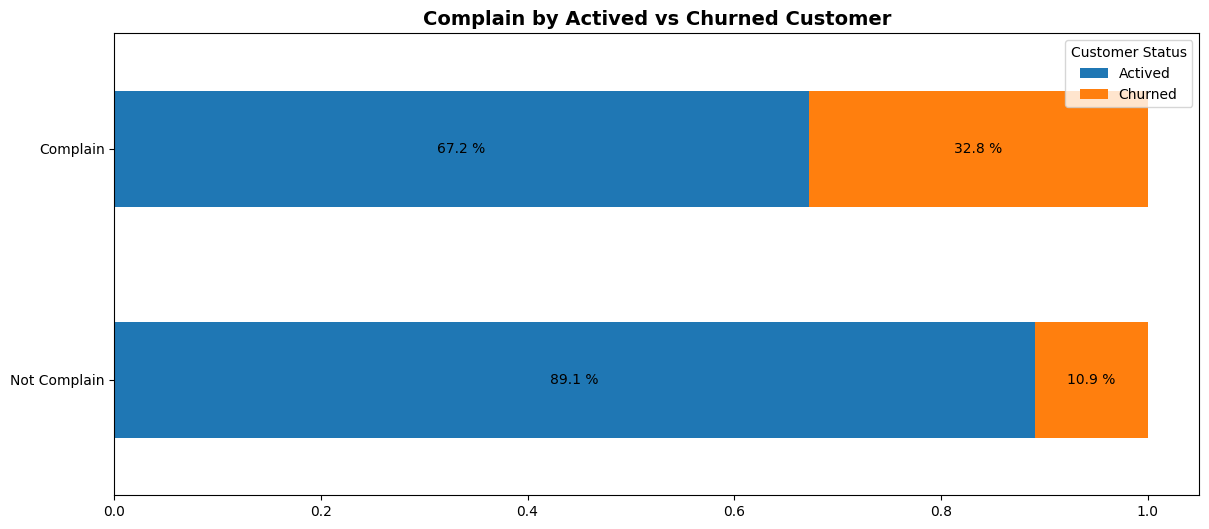

In [386]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
complain_churn = ecom_churn.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'Complain')

**Apakah semakin rendah angka kepuasannya maka semakin tinggi pula churn-nya?**

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,712.0,341.0,979.0,637.0,598.0
1,93.0,51.0,211.0,121.0,198.0
Total,805.0,392.0,1190.0,758.0,796.0
Churn %,11.6,13.0,17.7,16.0,24.9


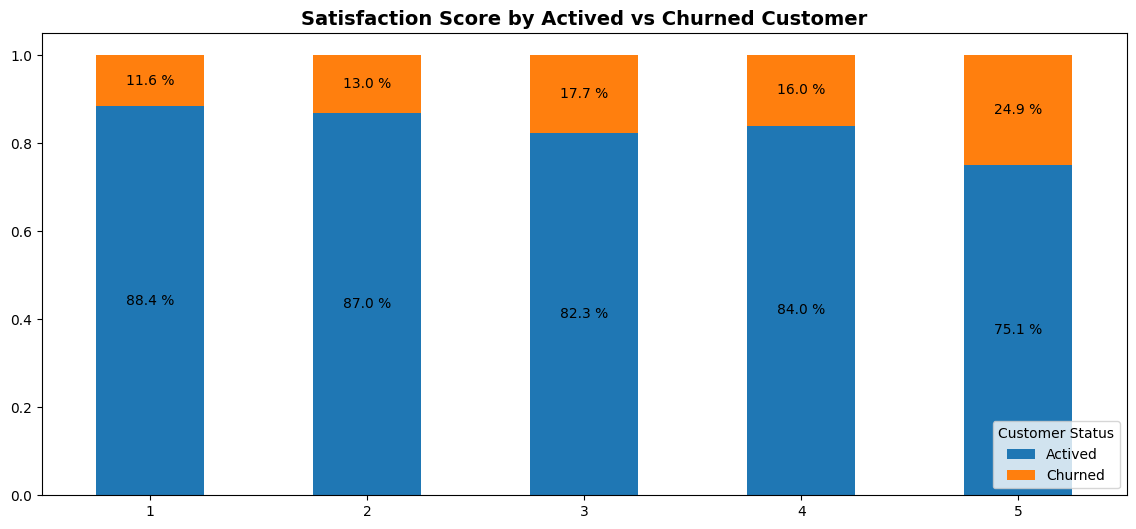

In [387]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
satisfaction_churn = ecom_churn.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
satisfaction_churn.plot.bar(stacked=True, ax= ax)
plt.title('Satisfaction Score by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

for ix, row in satisfaction_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'SatisfactionScore')

**Apakah pelanggan yang telah lebih dari seminggu tidak belanja cenderung akan churn?**

DaySinceLastOrder,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,31.0,46.0
Churn,,,,,,,,,,,,,,,,,,,,,,
0,222.0,310.0,461.0,541.0,272.0,132.0,69.0,269.0,334.0,187.0,104.0,54.0,41.0,33.0,24.0,12.0,8.0,12.0,7.0,1.0,1.0,0.0
1,123.0,128.0,85.0,91.0,40.0,23.0,12.0,45.0,48.0,21.0,7.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Total,345.0,438.0,546.0,632.0,312.0,155.0,81.0,314.0,382.0,208.0,111.0,58.0,42.0,33.0,28.0,13.0,8.0,12.0,7.0,1.0,1.0,1.0
Churn %,35.7,29.2,15.6,14.4,12.8,14.8,14.8,14.3,12.6,10.1,6.3,6.9,2.4,0.0,14.3,7.7,0.0,0.0,0.0,0.0,0.0,100.0


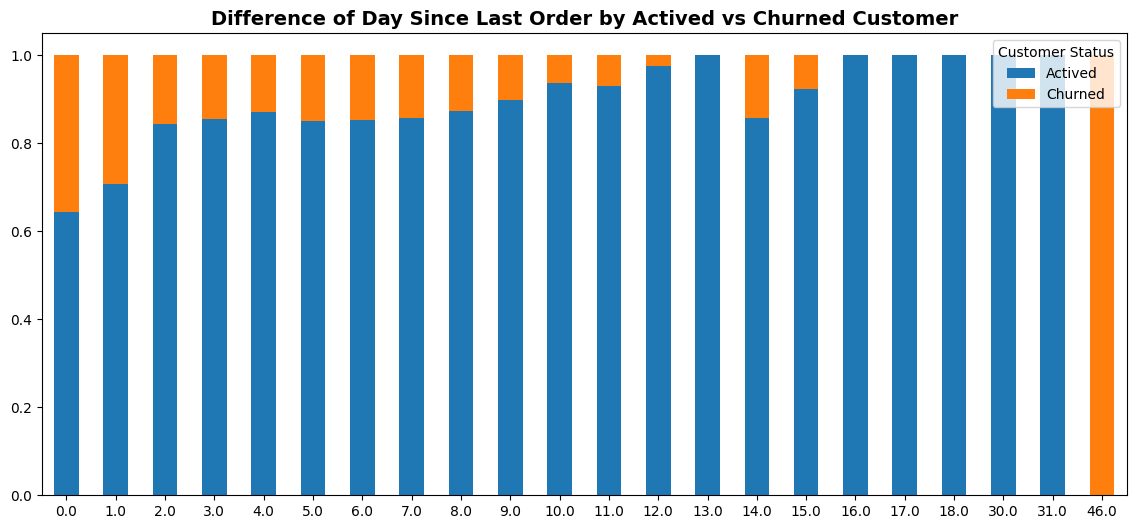

In [388]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
order_churn = ecom_churn.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')
plt.title('Difference of Day Since Last Order by Actived vs Churned Customer', size=14, weight='bold');

pd.set_option('display.max_columns', None)
crosstab_viz('Churn', 'DaySinceLastOrder')

**Apakah pelanggan yang banyak meregistrasikan alamat maupun device nya pada e-commerce cenderung tidak melakukan churn?**

NumberOfDeviceRegistered,1,2,3,4,5,6
Churn,,,,,,
0,146.0,178.0,1015.0,1400.0,458.0,70.0
1,18.0,14.0,178.0,294.0,133.0,37.0
Total,164.0,192.0,1193.0,1694.0,591.0,107.0
Churn %,11.0,7.3,14.9,17.4,22.5,34.6


NumberOfAddress,1,2,3,4,5,6,7,8,9,10,11,19,21,22
Churn,,,,,,,,,,,,,,
0,237.0,785.0,723.0,361.0,340.0,216.0,129.0,163.0,139.0,117.0,55.0,0.0,1.0,1.0
1,29.0,178.0,164.0,45.0,44.0,47.0,45.0,41.0,32.0,28.0,20.0,1.0,0.0,0.0
Total,266.0,963.0,887.0,406.0,384.0,263.0,174.0,204.0,171.0,145.0,75.0,1.0,1.0,1.0
Churn %,10.9,18.5,18.5,11.1,11.5,17.9,25.9,20.1,18.7,19.3,26.7,100.0,0.0,0.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


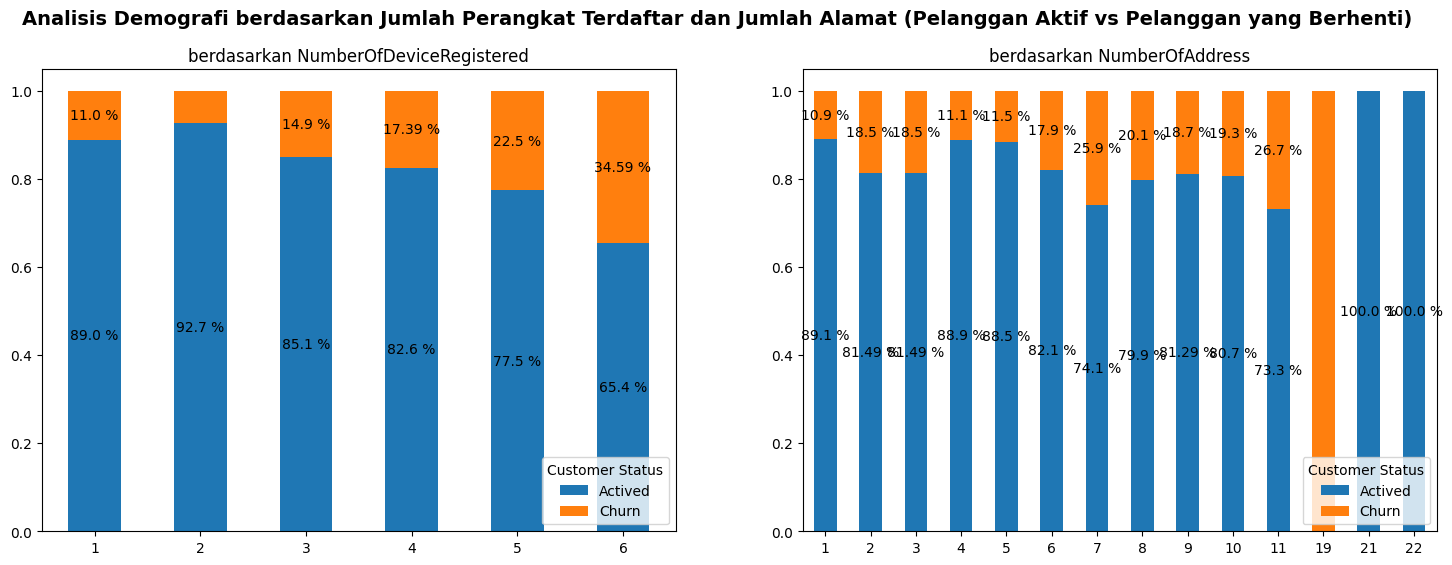

In [389]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Analisis Demografi berdasarkan Jumlah Perangkat Terdaftar dan Jumlah Alamat (Pelanggan Aktif vs Pelanggan yang Berhenti)', size=14, weight='bold')
demography = ['NumberOfDeviceRegistered', 'NumberOfAddress']
subplot = 1

for i in demography:
    ax = plt.subplot(1,2,subplot)
    demo_churn = ecom_churn.groupby(i)['Churn'].value_counts(normalize=True).unstack('Churn')
    demo_churn.plot.bar(stacked=True, ax= ax)
    plt.title(f'berdasarkan {i}')
    plt.xticks(rotation=0)
    plt.xlabel(None)
    plt.legend(title='Customer Status', labels=['Actived', 'Churn'], loc='lower right')

    for ix, row in demo_churn.reset_index(drop=True).iterrows():
            cumulative = 0
            for element in row:
                if element > 0.1:
                    plt.text(
                        ix,
                        cumulative + element / 2,
                        f"{int(round(element, 3) * 10000)/100} %",
                        va="center",
                        ha="center",
                    )
                cumulative += element
    subplot +=1

display(crosstab_viz('Churn', 'NumberOfDeviceRegistered'), crosstab_viz('Churn', 'NumberOfAddress'))

Pada NumberOfAddress terdapat outlier di angka 19, 21, 22 karena pelanggan sangat jarang meregistrasikan alamat sampai sebanyak itu

**Bagaimana kondisi churn pada marital status? Apakah pelanggan yang sudah menikah sedikit yang berhenti menggunakan layanan e-commerce ini?**

MaritalStatus,Divorced,Married,Single
Churn,,,
0,487.0,1825.0,955.0
1,89.0,230.0,355.0
Total,576.0,2055.0,1310.0
Churn %,15.5,11.2,27.1


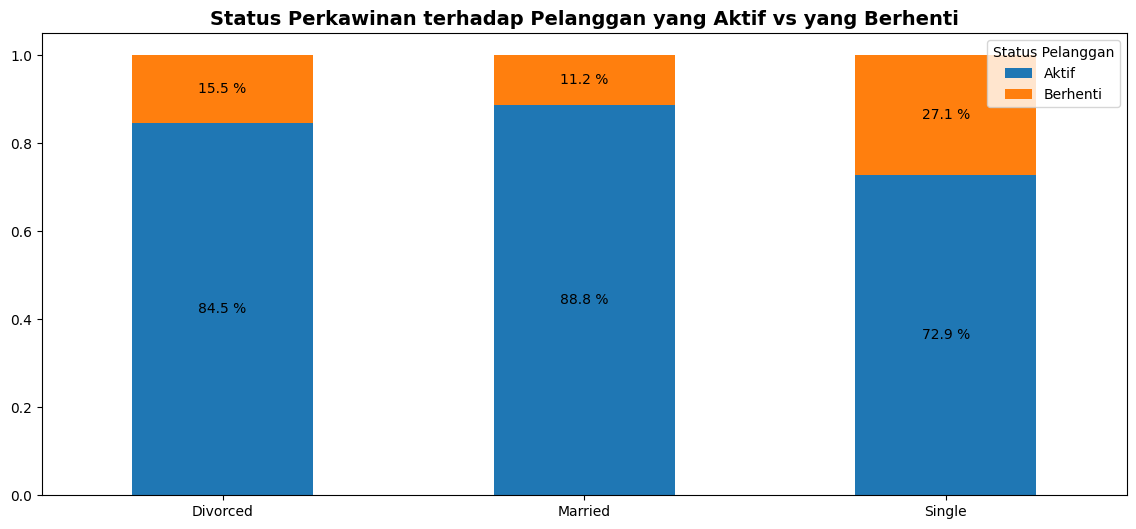

In [390]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
marital_churn = ecom_churn.groupby('MaritalStatus')['Churn'].value_counts(normalize=True).unstack('Churn')
marital_churn.plot.bar(stacked=True, ax= ax)
plt.title('Status Perkawinan terhadap Pelanggan yang Aktif vs yang Berhenti', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Status Pelanggan', labels=['Aktif', 'Berhenti'], loc='upper right')

for ix, row in marital_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'MaritalStatus')

# Data Pre-Processing

## Imputasi (Missing Values Handling)

Akan dilakukan imputasi untuk kolom yang memiliki missing value. Namun sebelum itu harus dilakukan data cleaning terlebih dahulu untuk kolom non-numerik

In [391]:
# Menggunakan OneHotEncoder untuk variabel kategorik
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_kategorik = encoder.fit_transform(ecom_churn[kategorik_cols]).toarray()

# Membuat DataFrame untuk data yang di-encode
encoded_kategorik_df = pd.DataFrame(encoded_kategorik, columns=encoder.get_feature_names_out(kategorik_cols))

# Gabungkan data kontinyu dan data yang di-encode
df_encoded = pd.concat([ecom_churn[list(diskrit_cols + kontinyu_cols)], encoded_kategorik_df], axis=1)
df_encoded


,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4,3,2,0,15.0,29.0,7.0,143.32,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4,1,2,0,7.0,25.0,7.0,129.29,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1,5,0,27.0,13.0,7.0,168.54,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,3,7,0,20.0,25.0,NaN,230.27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,4,8,0,30.0,15.0,8.0,322.17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,5,3,8,0,28.0,9.0,1.0,231.86,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3937,2,2,4,0,8.0,7.0,4.0,157.80,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3938,5,3,3,1,30.0,6.0,2.0,156.60,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3939,4,3,10,1,6.0,NaN,0.0,124.37,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### KNN

In [392]:
# Menghitung rata-rata hari sejak pesanan terakhir berdasarkan Tenure
average_day = ecom_churn.groupby('Tenure')['DaySinceLastOrder'].mean().reset_index()
average_day.columns = ['Tenure', 'Average Day Since Last Order']

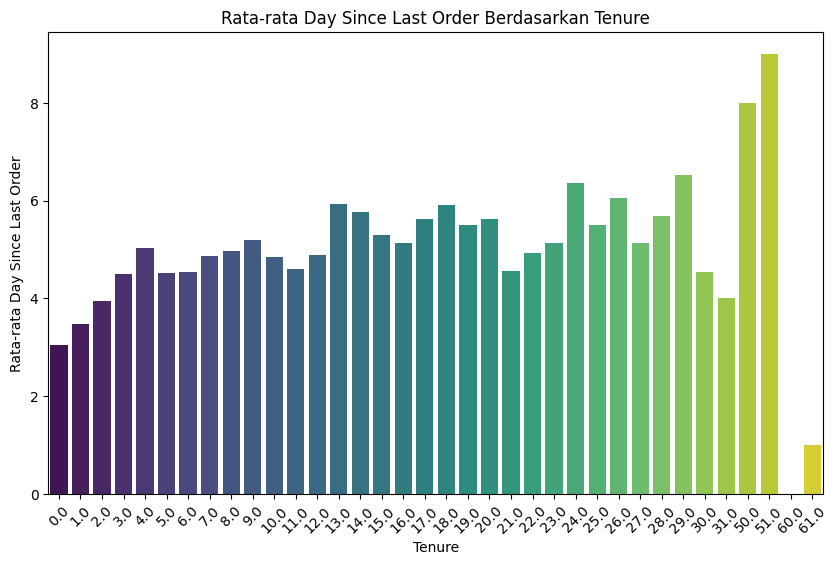

In [393]:
# Membuat bar chart untuk average_days
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Average Day Since Last Order', data=average_day, palette='viridis')
plt.title('Rata-rata Day Since Last Order Berdasarkan Tenure')
plt.xlabel('Tenure')
plt.ylabel('Rata-rata Day Since Last Order')
plt.xticks(rotation=45)  # Memutar label sumbu X jika diperlukan
plt.show()

Dilihat dari visualisasi antara Tenure dan DaySinceLastOrder, terlihat adanya pola yang menunjukkan bahwa rata-rata pelanggan terakhir melakukan order tercermin pada lamanya mereka menjadi pelanggan. Namun, karena hubungan ini tidak linear, maka untuk imputasi missing value digunakan metode K-Nearest Neighbors (KNN) agar lebih akurat dengan mengikuti nilai-nilai dari tetangga terdekat

In [394]:
# Imputasi nilai yang hilang menggunakan KNNImputer
knn_imputer = KNNImputer(n_neighbors=6)
df_imputed = knn_imputer.fit_transform(df_encoded)

# Mengubah hasil imputasi menjadi DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns)

In [395]:
df_imputed.describe()

,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.00000,3941.000000,3941.000000,3941.000000
mean,3.679269,3.088302,4.237757,0.282416,9.829823,15.637444,4.713524,176.707419,0.148439,0.069272,0.369957,0.366912,0.04542,0.146156,0.521441,0.332403
std,1.013938,1.381832,2.626699,0.450232,8.415760,8.300893,3.709385,48.791784,0.355580,0.253948,0.482854,0.482023,0.20825,0.353307,0.499603,0.471134
min,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,0.000000,2.000000,9.000000,2.000000,145.700000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,0.000000,8.000000,14.000000,3.000000,163.340000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,4.000000,4.000000,6.000000,1.000000,15.000000,20.000000,8.000000,195.250000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000
max,6.000000,5.000000,22.000000,1.000000,61.000000,127.000000,46.000000,324.990000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [396]:
# Menambahkan kolom 'Churn' ke DataFrame df
df_imputed['Churn'] = ecom_churn['Churn']

In [349]:
df_imputed.isnull().sum()

NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
Tenure                                 0
WarehouseToHome                        0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferedOrderCat_Fashion               0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile Phone          0
PreferedOrderCat_Others                0
MaritalStatus_Divorced                 0
MaritalStatus_Married                  0
MaritalStatus_Single                   0
Churn                                  0
dtype: int64

semua missing value sudah berhasil terisi

In [397]:
# Mengembalikan data yang sudah di encode
encoded_columns = df_encoded.columns

decoded_df = pd.DataFrame(index=df_encoded.index)

for col in encoded_columns:
    if '_' in col:  # Memastikan kolom adalah hasil encoding
        original_col = col.split('_')[0]  # Mendapatkan nama kolom asli
        if original_col not in decoded_df.columns:
            decoded_df[original_col] = df_encoded[[c for c in encoded_columns if c.startswith(original_col + '_')]].idxmax(axis=1).apply(lambda x: x.split('_', 1)[1])



# Menambahkan hasil decoding ke df_imputed
df_imputed = pd.concat([df_imputed, decoded_df], axis=1)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'PreferedOrderCat_Fashion', 
    'PreferedOrderCat_Grocery', 
    'PreferedOrderCat_Laptop & Accessory', 
    'PreferedOrderCat_Mobile Phone', 
    'PreferedOrderCat_Others', 
    'MaritalStatus_Divorced', 
    'MaritalStatus_Married', 
    'MaritalStatus_Single'
]
df_imputed.drop(columns=columns_to_drop, inplace=True, errors='ignore')

## Data Cleaning

### Duplicate Data dan Outliers

In [399]:
# Memeriksa apakah ada data duplikat
has_duplicates = df_imputed.duplicated().any()
print(f"Ada data duplikat: {has_duplicates}")

# Menghitung jumlah baris duplikat
duplicate_count = df_imputed.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Ada data duplikat: True
Jumlah data duplikat: 672


In [400]:
# Menghapus baris duplikat
df = df_imputed.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {ecom_churn_cleaned.shape[0]}")

Jumlah data setelah menghapus duplikat: 3269


Terdapat 672 data customer yang duplikat yang keseluruhannya di drop. Drop duplikat ini dilakukan agar saat modeling, algoritmanya belajar dari data yang spesifik saja. Apabila data duplikat dibiarkan, maka algoritma model akan terlalu mempelajari data yang duplikat tersebut dan menghasilkan prediksi data yang kurang baik (bias)

In [401]:
def outliers_count(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    jumlah_outlier = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
    print(f'Jumlah outlier untuk {column}: {jumlah_outlier}')
    return dataframe

def outlier_treatment(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = np.where(dataframe[column] > upper_bound, upper_bound,
                                 np.where(dataframe[column] < lower_bound, lower_bound, dataframe[column]))
    jumlah_outlier = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
    print(f'Jumlah outlier untuk {column}: {jumlah_outlier}')
    return dataframe

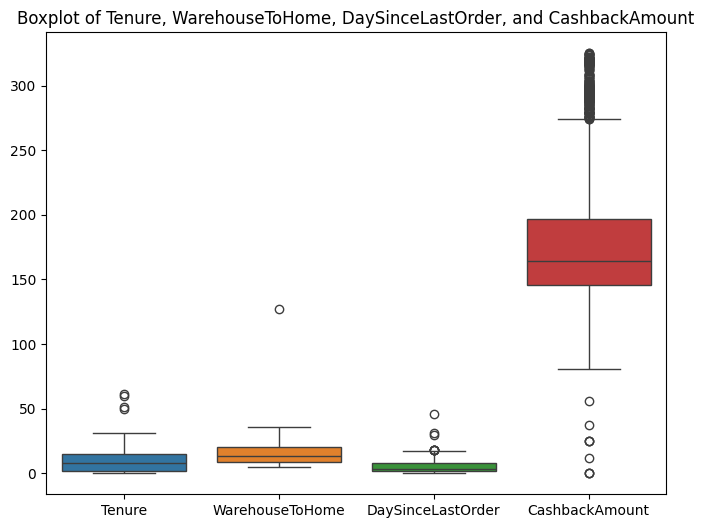

In [402]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']])
plt.title('Boxplot of Tenure, WarehouseToHome, DaySinceLastOrder, and CashbackAmount')
plt.show()

In [403]:
outliers_count(df, 'Tenure')
outliers_count(df, 'WarehouseToHome')
outliers_count(df, 'DaySinceLastOrder')
df = outliers_count(df, 'CashbackAmount')

Jumlah outlier untuk Tenure: 4
Jumlah outlier untuk WarehouseToHome: 1
Jumlah outlier untuk DaySinceLastOrder: 9
Jumlah outlier untuk CashbackAmount: 253


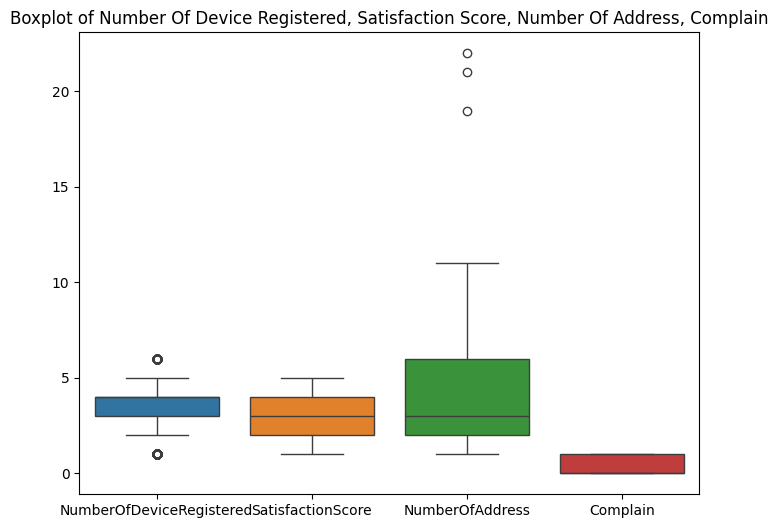

In [404]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[diskrit_cols])
plt.title('Boxplot of Number Of Device Registered, Satisfaction Score, Number Of Address, Complain')
plt.show()

In [405]:
outliers_count(df, 'NumberOfDeviceRegistered')
outliers_count(df, 'SatisfactionScore')
outliers_count(df, 'NumberOfAddress')
df = outliers_count(df, 'Complain')

Jumlah outlier untuk NumberOfDeviceRegistered: 226
Jumlah outlier untuk SatisfactionScore: 0
Jumlah outlier untuk NumberOfAddress: 3
Jumlah outlier untuk Complain: 0


In [406]:
df = outlier_treatment(df, 'Tenure')
df = outlier_treatment(df, 'WarehouseToHome')
df = outlier_treatment(df, 'DaySinceLastOrder')
df = outlier_treatment(df, 'CashbackAmount')
df = outlier_treatment(df, 'NumberOfDeviceRegistered')
df = outlier_treatment(df, 'NumberOfAddress')

Jumlah outlier untuk Tenure: 0
Jumlah outlier untuk WarehouseToHome: 0
Jumlah outlier untuk DaySinceLastOrder: 0
Jumlah outlier untuk CashbackAmount: 0
Jumlah outlier untuk NumberOfDeviceRegistered: 0
Jumlah outlier untuk NumberOfAddress: 0


Dilakukan capping untuk treatment outliers karena jumlah outlier yang besar dan data masih dibutuhkan

In [414]:
# Mengubah tipe data kolom NumberOfDeviceRegistered dan NumberOfAddress menjadi integer karena terlihat pada data max dan minimum float padahal tidak mungkin device registered ada 0.5 nya
df['NumberOfDeviceRegistered'] = df['NumberOfDeviceRegistered'].astype('int')
df['NumberOfAddress'] = df['NumberOfAddress'].astype('int')

In [410]:
df.describe()

,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,Tenure,WarehouseToHome,DaySinceLastOrder,CashbackAmount,Churn
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000
mean,3.649434,3.020801,4.215662,0.281738,9.916998,15.481646,4.704344,175.759449,0.163047
std,0.967060,1.395326,2.586032,0.449915,8.453115,8.199537,3.615519,44.541398,0.369465
min,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,69.040000,0.000000
25%,3.000000,2.000000,2.000000,0.000000,2.000000,9.000000,2.000000,145.900000,0.000000
50%,4.000000,3.000000,3.000000,0.000000,8.000000,13.666667,3.500000,163.890000,0.000000
75%,4.000000,4.000000,6.000000,1.000000,15.000000,20.000000,8.000000,197.140000,0.000000
max,5.000000,5.000000,12.000000,1.000000,34.500000,36.500000,17.000000,274.000000,1.000000


In [411]:
ecom_churn.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [415]:
df.dtypes

NumberOfDeviceRegistered      int64
SatisfactionScore           float64
NumberOfAddress               int64
Complain                    float64
Tenure                      float64
WarehouseToHome             float64
DaySinceLastOrder           float64
CashbackAmount              float64
Churn                         int64
PreferedOrderCat             object
MaritalStatus                object
dtype: object

### Pre-processing

In [431]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

In [434]:
# Define X and Y
x = df.drop(columns=['Churn'])
y = df['Churn']

In [435]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [437]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile Phone,onehot__PreferedOrderCat_Others,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__Tenure,remainder__WarehouseToHome,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,1.0,14.000000,12.0,0.0,235.91
1,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,9.0,0.0,21.000000,22.0,7.0,164.39
2,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,9.0,0.0,25.000000,17.0,4.0,131.49
3,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,2.0,1.0,5.000000,12.0,4.0,173.21
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,1.0,4.833333,12.0,5.0,123.06


# Modelling

In [440]:
# Classification Models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier(objective='binary', random_state=0)

In [441]:
# Scalers
robust = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()

Model Benchmark

In [444]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

f2_score = make_scorer(fbeta_score,beta=2)

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', robust),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean F2':rata,
    'sdev':std}).set_index('model').sort_values(by='mean F2',ascending=False)

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163002 -> initscore=-1.636060
[LightGBM] [Info] Start training from score -1.636060
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Bo

,mean F2,sdev
model,,
XGBoost,0.666397,0.032409
LightGBM,0.655086,0.038247
Random Forest,0.620295,0.033439
Decision Tree,0.616675,0.049108
Logistic Regression,0.498479,0.043756
KNN,0.432414,0.046838


Metric yang akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah klasifikasi kali adalah dengan F2 score. F2 Score adalah metric klasifikasi yang menggunakan pemberatan rata-rata harmonis dari precision dan recall. Berbeda dengan F1 score yang memberikan bobot seimbang pada precision dan recall, F2 score lebih menitikberatkan/ memberikan bobot kepada 'recall' daripada 'precision'. Penggunaan F2 score sebagai metric dari model yang dipakai, sejalan dengan business model yang sudah dijelaskan di awal.

Dari semua model benchmark yang di analisa, terlihat bahwa LightGBM (0.655) dan XGBoost (0.666) memikiki  meannya yang lebih tinggi dibandingkan dengan model lainnya, dimana semakin tinggi mean, akan semakin bagus model, begitu juga dengan standard deviasi dari kedua model yang cukup stabil, karena semakin kecil standard deviasi nya, maka semakin stabil modelnya.

Predict To Test Set

In [447]:
models = [xgb,lgbm]
score_f2 = []

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', robust),
        ('model',i)])
    
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    score_f2.append(fbeta_score(y_test, y_pred,beta=2))

score_before_tuning = pd.DataFrame({'Models':models,'F2_score':score_f2})
score_before_tuning

[LightGBM] [Info] Number of positive: 426, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 2615, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162906 -> initscore=-1.636761
[LightGBM] [Info] Start training from score -1.636761


,Models,F2_score
0,"XGBClassifier(base_score=None, booster=None, c...",0.677481
1,"LGBMClassifier(objective='binary', random_stat...",0.684008


## Hyperparameter

Karena model LGBM Classifier memiliki performa yang lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model LGBM Classifier ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model LGBM Classifier dengan harapan dapat meningkatkan performa model. 

LightGBM CLassifier framework Gradient Boosting yang menggunakan algoritma 'tree-based'. Algoritma ini di desain untuk efisien dan dengan beberapa kelebihan:

- Kecepatan 'training' yang lebih cepat dan memiliki efisiensi yang tinggi
- Penggunaan memori yang lebih sedikit
- Accuracy yang lebih baik
- Mendukung pembelajaran GPU, parallel, dan terdistribusi. 
- Mampu untuk mengolah data dalam skala yang besar

Berikut beberapa parameter yang akan kita coba:

- **max_depth**  =  This parameter is an integer that controls the maximum distance between the root node of each tree and a leaf node. Decrease max_depth to reduce training time.
- **num_leaves** (min_split_loss) = max number of leaves in one tree.
- **min_data_in_leaf** = Minimum number of observations that must fall into a tree node for it to be added.
- **num_iterations** = parameter controls the number of boosting rounds that will be performed.
- **learning rate** = shrinkage rate to prevents overfitting.

In [450]:
ros = RandomOverSampler(random_state=0)

In [451]:
# Random Search
hyperparam_space = {
    'model__max_depth': list(np.arange(1, 31)),
    'model__num_leaves':list(np.arange(2,900,5)),
    'model__min_data_in_leaf': list(np.arange(10,101,2)),
    'model__num_iterations':list(np.arange(10,101,2)),
    'model__learning_rate': list(np.arange(0.1,1,0.01))
}

model_pipe_LightGBM = Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('scaler',robust),
    ('model', lgbm)
])

random_lgbm = RandomizedSearchCV(
    estimator = model_pipe_LightGBM,
    param_distributions=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    n_iter=1000,
    random_state=0,
)

random_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('oversampling',
                                              RandomOverSampler(random_state=0)),
                                             ('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              LGBMClassifier(objective='binary',
                                                             random_state=0))]),
                   n_iter=1000,...
                                                              np.int64(52),
                                                              np.int64(57),
                                                              np.int64(62),
                                                              np.int64(67),
                                                              np.int64(72),
                                                              np.int64(77),
                                                              np.int64(82),
                                                              np.int64(87),
                                                              np.int64(92),
                                                              np.int64(97),
                                                              np.int64(102),
                                                              np.int64(107),
                                                              np.int64(112),
                                                              np.int64(117),
                                                              np.int64(122),
                                                              np.int64(127),
                                                              np.int64(132),
                                                              np.int64(137),
                                                              np.int64(142),
                                                              np.int64(147), ...]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

Model LightGBM seringkali menjadi algoritma yang lebih baik diantara yang lain, juga karena LightGBM merupakan algoritma gradient boosting yang sifatnya iteratif.

Konsepnya, boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah. Kita mentransformasi weak learner menjadi strong learner. Weak learner dapat dipandang sebagai model machine learning yang performanya tidak terlalu bagus.

Siklus dalam gradien boosting adalah pertama kita membuat satu tree lalu kita perbaiki modelnya dengan cara memberikan perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses dilakukan terus menerus hingga titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya.

In [452]:
pd.DataFrame(random_lgbm.cv_results_).sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__num_leaves,param_model__num_iterations,param_model__min_data_in_leaf,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,0.220661,0.017974,0.021512,0.001179,787,28,18,5,0.29,"{'model__num_leaves': 787, 'model__num_iterati...",0.709382,0.737885,0.818386,0.722348,0.759219,0.749444,0.038266,1
471,0.154613,0.011145,0.021014,0.001897,832,28,34,4,0.20,"{'model__num_leaves': 832, 'model__num_iterati...",0.704846,0.760171,0.796943,0.734341,0.743534,0.747967,0.030372,2
59,0.109625,0.010800,0.020608,0.001359,817,16,48,2,0.94,"{'model__num_leaves': 817, 'model__num_iterati...",0.732484,0.727651,0.822785,0.711297,0.744898,0.747823,0.038998,3
952,0.255287,0.042834,0.020999,0.001408,742,16,52,20,0.18,"{'model__num_leaves': 742, 'model__num_iterati...",0.690045,0.773420,0.788889,0.750552,0.735931,0.747767,0.034143,4
131,0.326050,0.028160,0.021917,0.001364,892,84,12,4,0.15,"{'model__num_leaves': 892, 'model__num_iterati...",0.712617,0.776805,0.781609,0.699541,0.762527,0.746620,0.033944,5


In [453]:
print(random_lgbm.best_score_)
print(random_lgbm.best_params_)

0.7494439965085925
{'model__num_leaves': np.int64(787), 'model__num_iterations': np.int64(28), 'model__min_data_in_leaf': np.int64(18), 'model__max_depth': np.int64(5), 'model__learning_rate': np.float64(0.2899999999999999)}


Setelah tuning, performa model LightGBM meningkat:

| Condition | Mean F2 Score | Std Dev |
| --- | --- | --- |
| Before Tuning | 0.684 | 0.055 |
| After Tuning | 0.749 | 0.048 |

Best parameter RandomizedSearch:
- model__num_leaves: 787
- model__num_iterations: 28
- model__min_data_in_leaf: 18
- model__max_depth: 5
- model__learning_rate: 0.2899999999999999

In [455]:
# Define model terhadap estimator terbaik
best_model = random_lgbm.best_estimator_

# Fitting model
best_model.fit(x_train, y_train)

# Predict test set
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

f2_default = fbeta_score(y_test, y_pred_default,beta=2)
f2_tuned = fbeta_score(y_test, y_pred_tuned,beta=2)

print('F2 Score Default LGBM : ', f2_default)
print('F2 Score Tuned LGBM : ', f2_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

Setelah kita predict model ke test set dan telah di hyperparameter tuning, terlihat bahwa performa model (F2 score) meningkat sebanyak 7% dari 68% menjadi 75%.

### Confusion Matrix Before & After Tuning

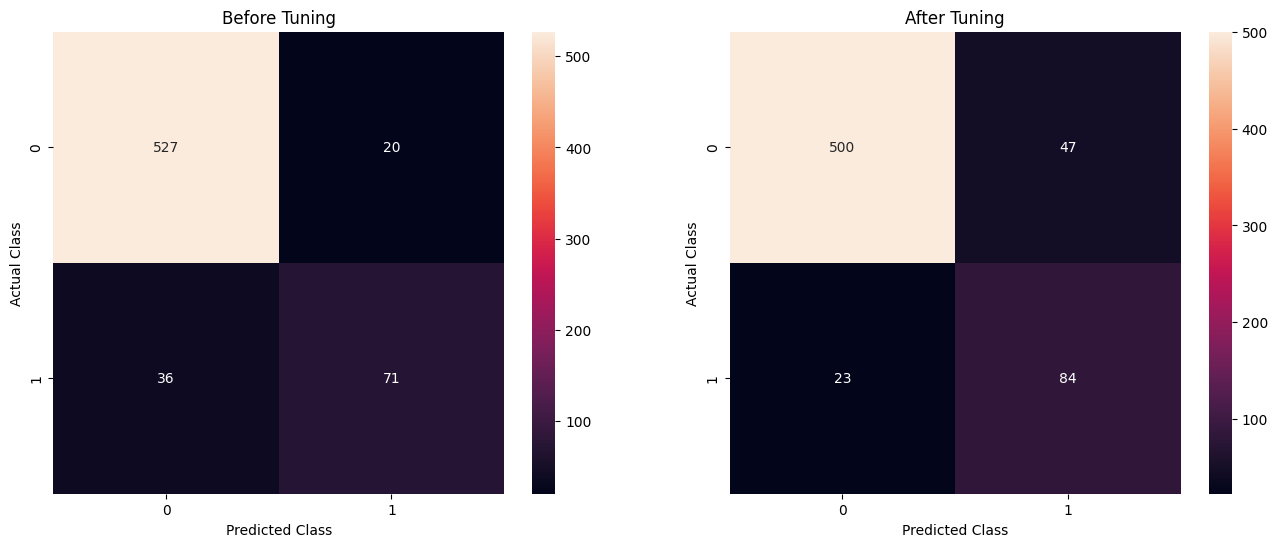

In [457]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='g').set_title('Before Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='g').set_title('After Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class');

- TP: 84 (diprediksi customer akan churn, dan aktualnya juga churn)
- TN: 527 (diprediksi tidak melakukan claim, dan aktualnya juga tidak melakukan claim)
- FP: 23 (diprediksi customer akan churn, tapi aktualnya TIDAK churn)
- FN: 20 (diprediksi customer tidak churn, tapi aktualnya churn)

FP cost: Kita mengira orang tersebut akan churn yg mana akan membuat perusahaan akan memberikan promo atau penawaran menarik untuk mencegah customer tersebut churn, padahal ternyata tidak churn. Jadi kita mengeluarkan uang untuk biaya promosi

FN cost: Kita mengira orang tersebut TIDAK akan churn, yang artinya perusahaan TIDAK akan membuat promosi atau penawaran menarik terhadap orang tersebut, akan tetapi kenyataannya customer tersebut churn, sehingga perusahaan kehilangan uang.

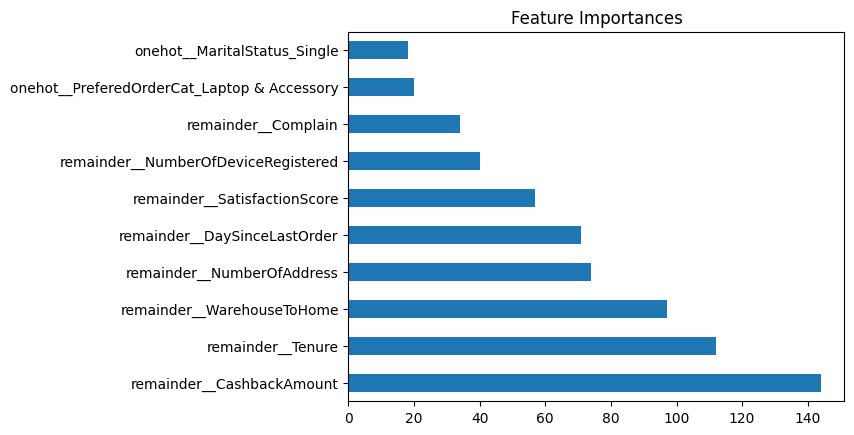

In [459]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

## Conclusion

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil kesimpulan bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi customer yang churn atau tidak, berdasarkan hasil F2 score oleh model LGBM kita mendapatkan akurasi F2 score 0.684 sebelum hyperparameter tuning. Setelah melakukan hyperparameter tuning hasil meningkat menjadi 0.749. Untuk hasil yang tidak akurat, kita menitikberatkan ke False Negative karena jumlah pelanggan tidak churn cenderung lebih tinggi sehingga akan lebih merugikan dibandingkan False Positive.

Statistik Churn menggunakan y_test (20%): 
- 0: 547
- 1: 107
- **Total data**: 654

<u>**Tanpa model:**</u>

Tanpa model, kita sulit untuk mengetahui customer mana yang churn atau tidak, Maka perhitungannya:
- Total customer yang pasti churn setelah diberi promo: 107 orang,
- Acquisition cost untuk menggantikan customer yang churn:
(dengan asumsi biaya untuk pemberian diskon adalah $400)
    **107 * 400 USD = 42800 USD**
- Total Biaya: 42800 USD
- Jumlah penghematan: 0 USD

sehingga potensi biaya akuisisi yang dikeluarkan menjadi lebih banyak.
<br><br>

<u>**Dengan model (test set yakni 20%):**</u>

Total data: 654

Berdasarkan confusion matrix:
- Biaya untuk promosi: (84+20) * 100 USD = 10400 USD
- Acquisition cost untuk menggantikan customer yang churn: 23 * 400 USD = 9200 USD
- Total Biaya: 10400 USD + 9200 USD = **19600 USD**
- Jumlah penghematan: **42800 USD - 19600 USD = 23200 USD**

Berdasarkan perhitungan di atas, dengan menggunakan model machine learning yang telah dibuat, perusahaan bisa jauh lebih menghemat biaya yang dikeluarkan. Lebih baik mengeluarkan biaya untuk retention cost daripada lebih berpotensi untuk kehilangan customer (churn).

## Model Deployment

### Save Model

In [461]:
# fit
final_model = estimator.fit(X, y)

# save with pickle
pickle.dump(final_model, open('model_ecommerce_churn_lgbm.sav', 'wb'))

[LightGBM] [Info] Number of positive: 533, number of negative: 2736
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 3269, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163047 -> initscore=-1.635731
[LightGBM] [Info] Start training from score -1.635731


### Load Model

In [462]:
loaded_model = pickle.load(open('model_ecommerce_churn_lgbm.sav', 'rb'))